In [1]:
import sys
import re
import os
import time
import datetime
import pandas as pd
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 5, 10
%matplotlib inline

In [2]:
df = pd.read_csv(os.getcwd()+"/data/20161117-ww1.csv",sep=',',error_bad_lines=False)

In [3]:
df.columns.values

array(['ID', 'Mission Date', 'Operation', 'Country', 'SERVICE', 'Unit',
       'Mission design series aircraft', 'Mission Number', 'Time of Day',
       'Departure', 'Number of Planes Attacking', 'Call Sign',
       'Weapons Expendend', 'Weapon Type', 'Weapon Weight', 'Bomb Load',
       'Latitude', 'Longitude', 'Target Location', 'Target Country',
       'Target Type', 'Launching Base', 'Base Latitude', 'Base Longitude',
       'Bomb Damage Assessment', 'Enemy Action', 'Route Details',
       'ISR COLLECTED', 'Friendly Casualties', 'WEATHER', 'Altitude',
       'Date of Record'], dtype=object)

In [4]:
df["Mission Date"] = df['Mission Date'].apply(lambda x:pd.to_datetime(x) )
# df.set_index('Mission Date')

In [ ]:
df["Mission Date"].dtype

In [5]:
# mask = (df['Mission Date'] > np.datetime64('1917-11-19')) & (df['Mission Date'] <= np.datetime64('1917-12-04'))
focus = df[(df["Operation"]=='Argonne-Meuse')]

In [12]:
focus["Mission Date"].min()

Timestamp('1918-09-18 00:00:00')

In [13]:
focus["Mission Date"].max()

Timestamp('1918-11-05 00:00:00')

In [10]:
focus.describe()

/Users/readywater/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ID,Mission Number,Time of Day,Weapon Weight,Bomb Load,Latitude,Longitude,Base Latitude,Base Longitude,Altitude
count,189.000000,189.000000,0.0,184.000000,183.000000,188.000000,188.000000,1.840000e+02,1.840000e+02,189.000000
mean,617.412698,75.407407,NaN,816.689703,96.926912,49.010080,5.326638,4.867382e+01,5.248075e+00,11999.730159
std,94.444169,14.528700,NaN,1106.070132,113.462366,1.154569,0.412041,1.424963e-13,2.404625e-14,2317.484120
min,443.000000,48.000000,NaN,0.000000,0.000000,44.500000,4.878740,4.867382e+01,5.248075e+00,3200.000000
25%,532.000000,63.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11500.000000
50%,619.000000,75.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13000.000000
75%,704.000000,89.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13650.000000
max,767.000000,100.000000,NaN,9680.000000,880.000000,49.520956,6.316667,4.867382e+01,5.248075e+00,15275.000000


In [14]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

In [21]:
print focus["Longitude"].min()
print focus["Latitude"].min()
print focus["Longitude"].max()
print focus["Latitude"].max(),

4.87874
44.5 6.316667
49.520956


In [22]:
plt.figure(figsize=(20,20))
m = Basemap(projection='merc',
              llcrnrlon = df["Longitude"].min(),              # lower-left corner longitude
              llcrnrlat = df["Latitude"].min(),                # lower-left corner latitude
              urcrnrlon = df["Longitude"].max(),               # upper-right corner longitude
              urcrnrlat = df["Latitude"].max(),              # upper-right corner latitude
              resolution = 'l',
              area_thresh = 100000.0,
              )

In [ ]:
# df[['Mission Day',"Mission Month",'Mission Year']].head()

In [23]:
# df[['LAT','LON']] = df[['LAT','LON']].apply(lambda x: pd.to_numeric(x, errors='ignore'))
# df[['LAT']] = df[['LAT']].apply(lambda x: x-900 if x>1000 else x)

# cambrai = df[["d"]]
x, y = m(focus['Longitude'].values, focus['Latitude'].values)

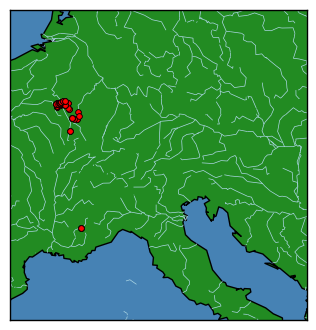

In [24]:
m.drawcoastlines()
m.drawrivers(color='lightblue')
m.fillcontinents()
m.drawmapboundary()
m.drawcounties()
m.fillcontinents(color = 'forestgreen')
m.drawmapboundary(fill_color='steelblue')
m.plot(x, y, 
            'o',                    # marker shape
            color='red',         # marker colour
            markersize=4)
plt.show()